# Fit di segnale in presenza di rumore

**NOTA BENE** *questo svolgimento fa rimerimento ad un testo leggermente più generico di quello effettivamente utilizzato durante la prova d'esame, che corrisponde al caso M = $\pi$.*

Molto spesso ci si trova nella situazione di dover determinare la quantit\`a di segnale presente in uno spettro misurato, sapendo di aver osservato un sistema fisico che produce eventi di interesse (segnale) contaminati da impulsi spuri (il fondo).


 * Si scriva una libreria di Python che contenga l'implementazione di una distribuzione di densit\`a di probabilit\`a, chiamata \verb!pdf_fondo!, definita su un intervallo $[0,M]$. La funzione avrà la forma di $A \times \sin (Bx)$, dove i due parametri $A$ e $B$ sono determinati dalle richieste che sull'intervallo di definizione la funzione formi mezzo periodo e che sia normalizzata. Si scriva la funzione in modo che, oltre alla variabile $x$, prenda in ingresso tutti i parametri necessari a definirla.
 * Si faccia il disegno della funzione sull'intervallo di definizione e si controlli che la funzione è normalizzata, utilizzando il metodo *hit-or-miss* di integrazione.

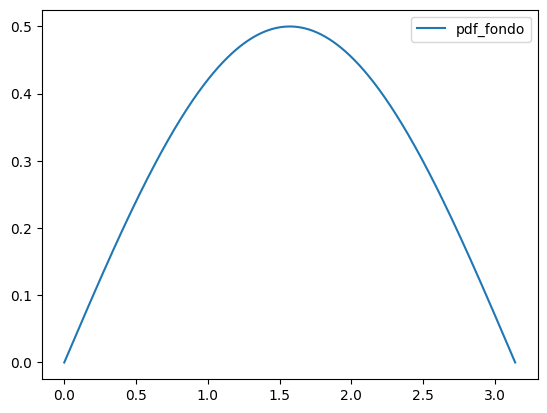

In [1]:
from lib import pdf_fondo, cdf_fondo, generate_range, inverse, sturges, generate_TAC, gauss
import matplotlib.pyplot as plt
import numpy as np
import random

M = np.pi

fig, ax = plt.subplots (nrows = 1, ncols = 1)
x_axis = np.linspace (0., M, 1000)
func = lambda x : pdf_fondo (x, M)
ax.plot (x_axis, func (x_axis), label = 'pdf_fondo')
ax.legend ()
plt.show ()

In [2]:
from lib import integral_HOM

integral = integral_HOM (func, 0., M, func (M/2), 10000)

print ('the resulting integral is:', integral[0] , '+-', np.sqrt (integral[1]))

the resulting integral is: 0.9985552249435158 +- 0.007559195341973449



 * si generi un campione di 1000 punti pseudo-casuali distribuiti secondo \verb!pdf_fondo! utilizzando il metodo della funzione inversa e se ne disegni l'istogramma, scegliendone con un algoritmo opportuno il binnaggio.

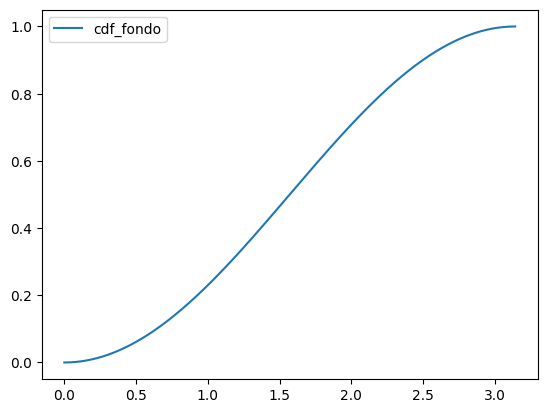

In [3]:
fig, ax = plt.subplots (nrows = 1, ncols = 1)
func_2 = lambda x : cdf_fondo (x, M)
ax.plot (x_axis, func_2 (x_axis), label = 'cdf_fondo')
ax.legend ()
plt.show ()

(array([  5.,  18.,  26.,  33.,  48.,  64.,  68.,  72.,  90.,  85., 111.,
         92.,  98., 107.,  94., 106., 121.,  99.,  79.,  84.,  82.,  77.,
         82.,  70.,  73.,  37.,  33.,  23.,  22.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
        1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ,
        2.10526316, 2.21052632, 2.31578947, 2.42105263, 2.52631579,
        2.63157895, 2.73684211, 2.84210526, 2.94736842, 3.05263158,
        3.15789474, 3.26315789, 3.36842105, 3.47368421, 3.57894737,
        3.68421053, 3.78947368, 3.89473684, 4.        ]),
 <BarContainer object of 38 artists>)

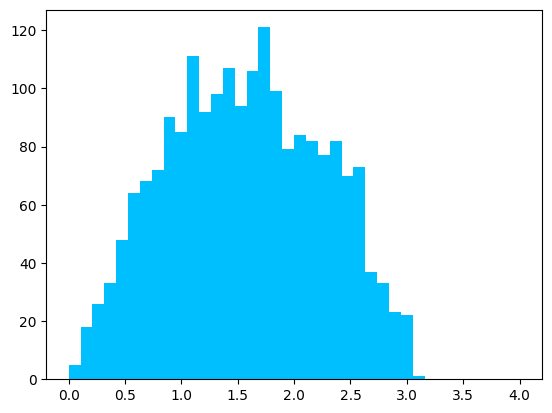

In [4]:
N_evt = 2000

sample_bkg = [inverse (random.random (), M) for x in range (N_evt)]

h_min = np.floor (min (sample_bkg))
h_max = np.ceil (max (sample_bkg))
n_bins = sturges (len (sample_bkg))

bin_content, bin_edges = np.histogram (sample_bkg, bins = n_bins, range = (h_min, h_max))

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (sample_bkg,
         bins = bin_edges,
         color = 'deepskyblue',
        )



 * Si generi, utilizzando il metodo \textit{try-and-catch}, un secondo campione di 1000 eventi secondo una distribuzione Gaussiana con media $M/4$ e larghezza $M/16$, lo si unisca a quello generato precedentemente.

(array([  4.,   3.,  24.,  18.,  23.,  51.,  91., 134., 202., 227., 249.,
        209., 169., 132.,  87.,  79.,  81.,  73.,  84.,  58.,  81., 104.,
         70.,  76.,  57.,  63.,  62.,  63.,  66.,  53.,  54.,  54.,  56.,
         49.,  16.,  23.,  21.,  24.,   9.,   1.]),
 array([0.        , 0.07853982, 0.15707963, 0.23561945, 0.31415927,
        0.39269908, 0.4712389 , 0.54977871, 0.62831853, 0.70685835,
        0.78539816, 0.86393798, 0.9424778 , 1.02101761, 1.09955743,
        1.17809725, 1.25663706, 1.33517688, 1.41371669, 1.49225651,
        1.57079633, 1.64933614, 1.72787596, 1.80641578, 1.88495559,
        1.96349541, 2.04203522, 2.12057504, 2.19911486, 2.27765467,
        2.35619449, 2.43473431, 2.51327412, 2.59181394, 2.67035376,
        2.74889357, 2.82743339, 2.9059732 , 2.98451302, 3.06305284,
        3.14159265]),
 <BarContainer object of 40 artists>)

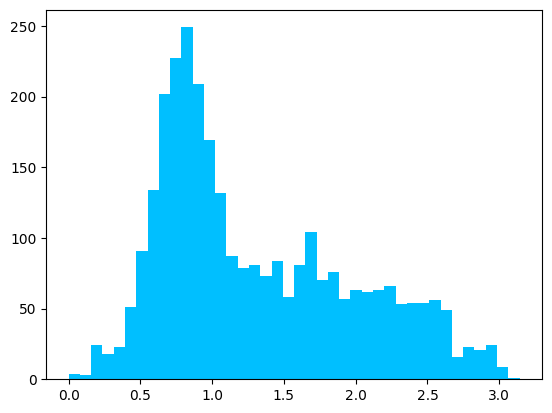

In [5]:
func_3 = lambda x : gauss (x, M/4, M/20)
sample_sig = generate_TAC (func_3, 0., M/2, func_3 (M/4), 1000)

sample_tot = sample_bkg + sample_sig

h_min = 0
h_max = M
n_bins = sturges (len (sample_tot))

bin_content, bin_edges = np.histogram (sample_tot, bins = n_bins, range = (h_min, h_max))

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (sample_tot,
         bins = bin_edges,
         color = 'deepskyblue',
        )



 *  Si determini quale sia il bias medio dello stimatore $\hat{\mu}$ che determina la posizione del massimo del segnale con un fit Gaussiano fra $0$ e $M/2$.

In [6]:
# singolo fit di prova

from iminuit import Minuit
from scipy.stats import norm
from iminuit.cost import ExtendedBinnedNLL

sample_selected = [x for x in sample_tot if x < M/2.]
n_bins = sturges (len (sample_selected))
bin_content, bin_edges = np.histogram (sample_tot, bins = n_bins, range = (0., M/2.))

# the fitting function
def mod_total (bin_edges, N_signal, mu, sigma):
    return N_signal * norm.cdf (bin_edges, mu, sigma)
    
# the cost function for the fit
my_cost_func = ExtendedBinnedNLL (bin_content, bin_edges, mod_total)

sample_mean  = np.mean (sample_selected)
sample_sigma = np.std (sample_selected)

# the fitting algoritm
my_minuit = Minuit (my_cost_func, N_signal = len (sample_selected), mu = sample_mean, sigma = sample_sigma)
my_minuit.migrad ()

display (my_minuit)                       

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 236.8 (χ²/ndof = 6.8)      │              Nfcn = 52               │
│ EDM = 1.86e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal │  2.04e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ mu       │   0.905   │   0.008   │            │            │         │         │       │
│ 2 │ sigma    │   0.322   │   0.007   │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬────────────────────────────┐
│          │ N_signal       mu    sigma │
├──────────┼────────────────────────────┤
│ N_signal │ 2.12e+03 22.54e-3 34.93e-3 │
│       mu │ 22.54e-3 6.11e-05  0.01e-3 │
│    sigma │ 34.93e-3  0.01e-3 4.24e-05 │
└──────────┴────────────────────────────┘

In [7]:
# ripetizione di tanti fit per ottenere il bias medio

N_toys = 1000
means = []

for i in range (N_toys):
    sample_bkg = [inverse (random.random (), M) for x in range (N_evt)]
    sample_sig = generate_TAC (func_3, 0., M/2, func_3 (M/4), 1000)
    sample_tot = sample_sig + sample_bkg
    n_bins = sturges (len (sample_selected))
    bin_content, bin_edges = np.histogram (sample_tot, bins = n_bins, range = (0., M/2.))
    sample_mean  = np.mean (sample_selected)
    sample_sigma = np.std (sample_selected)
    
    # the fitting algoritm
    my_cost_func = ExtendedBinnedNLL (bin_content, bin_edges, mod_total)
    my_minuit = Minuit (my_cost_func, N_signal = len (sample_selected), mu = sample_mean, sigma = sample_sigma)
    my_minuit.migrad ()

    if not my_minuit.valid: continue
    means.append (my_minuit.values[1])

expected mean bias: 0.12275510289047387
expected bias standard deviation: 0.008177125046198636


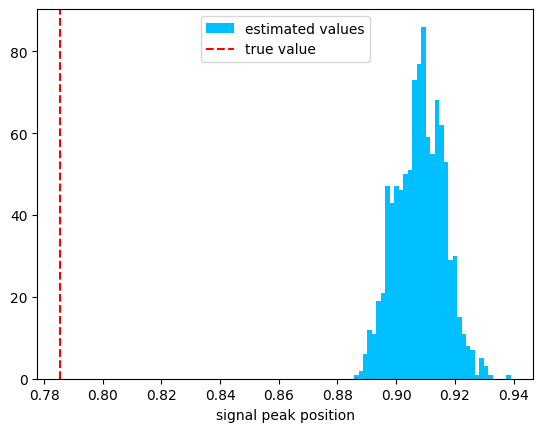

In [8]:
print ('expected mean bias:', np.mean (means) - M/4.)
print ('expected bias standard deviation:', np.std (means))

h_min = min (means) 
h_max = max (means)
n_bins = sturges (len (means))

bin_content, bin_edges = np.histogram (means, bins = n_bins, range = (h_min, h_max))

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (means,
         bins = bin_edges,
         color = 'deepskyblue',
         label = 'estimated values',
        )
ax.axvline (x=M/4., color='red', linestyle='--', label='true value')
ax.set_xlabel ('signal peak position')
ax.legend ()
